# Filters visualisation with matplotlib in Keras

In [92]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import math
import keras.callbacks

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

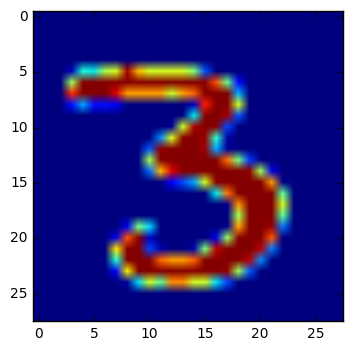

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
# Change shape
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Convert to float32 and normalise to range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [163]:
model = Sequential()
filters = 32
in_row  = 8.

In [164]:
rows = math.ceil(filters/in_row)
print rows, filters/in_row
print str(filters)+" = "+str(rows-1)+"*"+str(in_row)+" + "+str(filters % in_row)

4.0 4.0
32 = 3.0*8.0 + 0.0


In [165]:
model.add(Convolution2D(filters, 3, 3, dim_ordering="th", input_shape=(1,28,28)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(filters, 3, 3))
convout2 = Activation('relu')
model.add(convout2)
model.summary()
print model.output_shape

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 32, 26, 26)    320         convolution2d_input_7[0][0]      
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 32, 26, 26)    0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 30, 24, 32)    7520        activation_11[0][0]              
____________________________________________________________________________________________________
activation_12 (Activation)       (None, 30, 24, 32)    0           convolution2d_12[0][0]           
Total params: 7840
________________________________________________________________________

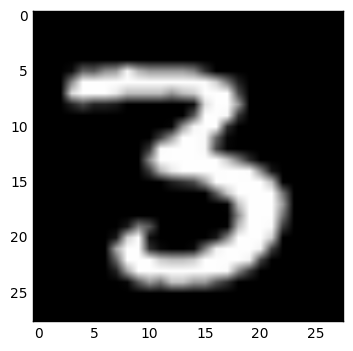

In [166]:
img_num = 12
plt.imshow(X_train[img_num],cmap="gray")
# Generate function to visualize first layer
from keras import backend as K
convout1_f = K.function(model.inputs, [convout1.output])
convolutions1 = np.asarray(convout1_f([[[X_train[img_num]]]]), dtype=np.float32)

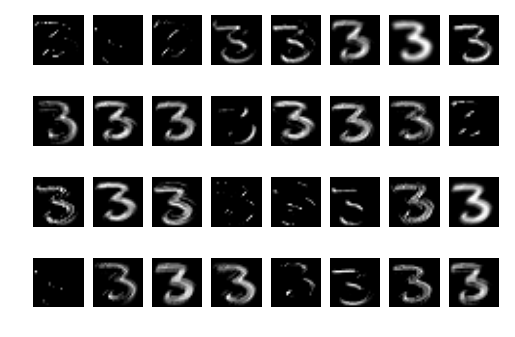

In [167]:
fig = plt.figure()
for i, convolution_d in enumerate(convolutions1[0]):
    for j, convolution in enumerate(convolution_d):        
        p=fig.add_subplot(rows,in_row,j+1)
        p.axis('off')
        plt.imshow(convolution, cmap="gray")        


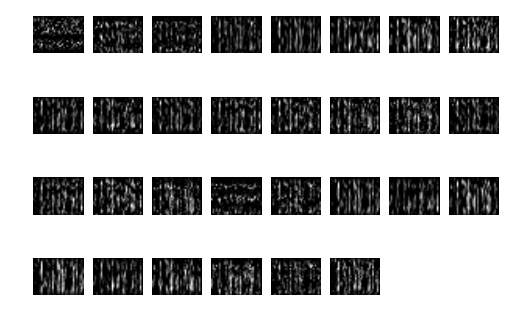

In [169]:
convout2_f = K.function(model.inputs, [convout2.output])
convolutions2 = np.asarray(convout2_f([[[X_train[img_num]]]]), dtype=np.float32)
fig = plt.figure()
for i, convolution_d in enumerate(convolutions2[0]):
    for j, convolution in enumerate(convolution_d):        
        p=fig.add_subplot(rows,in_row,j+1)
        p.axis('off')
        plt.imshow(convolution, cmap="gray")  